In [35]:
import keras
import random
import collections
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import random
import collections
import numpy as np
import matplotlib.pyplot as plt

In [36]:
import tensorflow as tf

# Load the MNIST dataset
dataset = tf.keras.datasets.mnist.load_data()


In [37]:
def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()

There are 60000 images in training dataset
There are 60000 images in training dataset
___________________
(28, 28)
___________________
index: 15304
Lable: 5


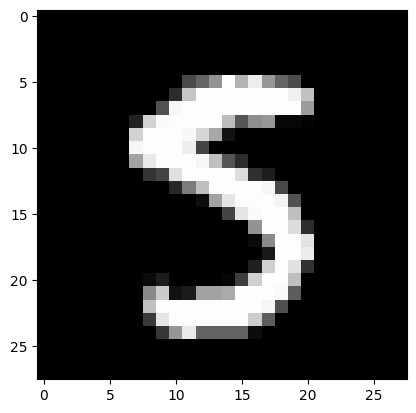

index: 6525
Lable: 7


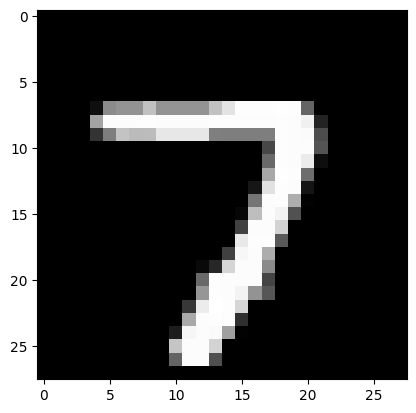

index: 561
Lable: 3


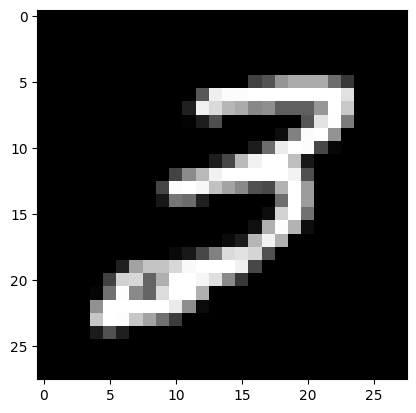

index: 19291
Lable: 8


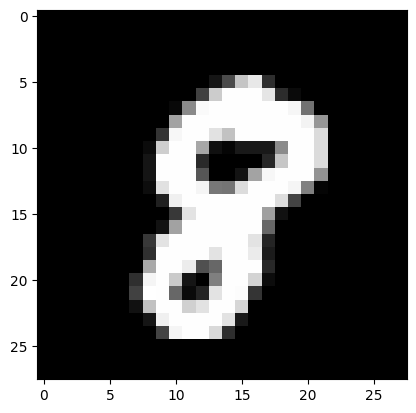

index: 32770
Lable: 8


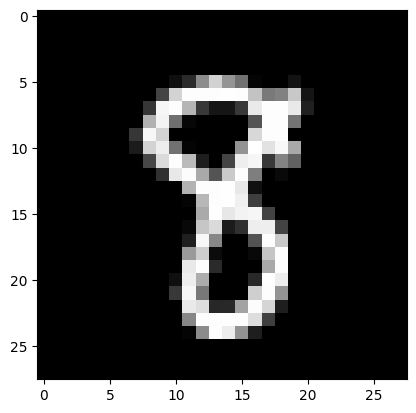

index: 24166
Lable: 5


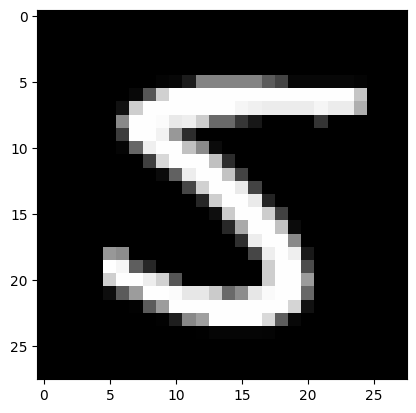

index: 26777
Lable: 6


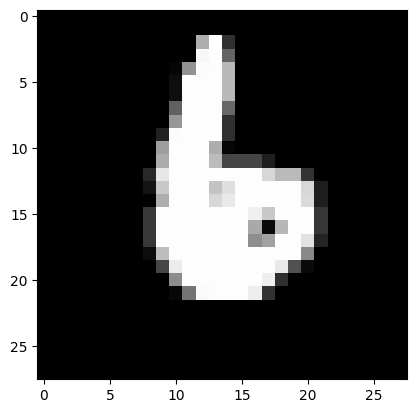

index: 25538
Lable: 3


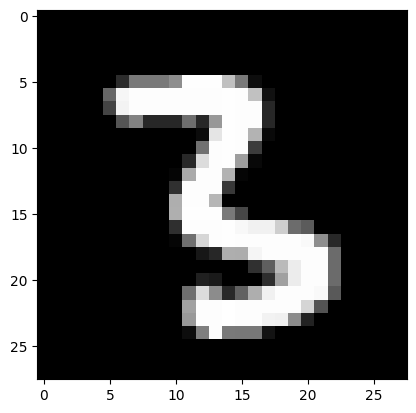

index: 14279
Lable: 8


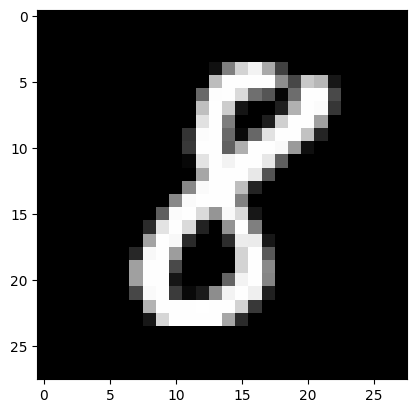

index: 58067
Lable: 3


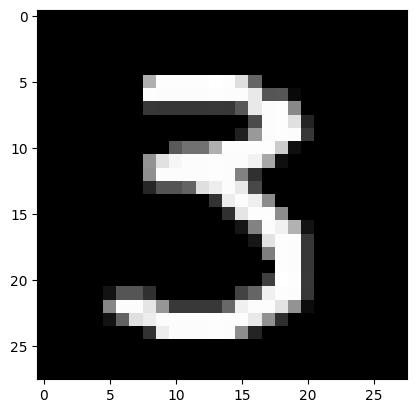

___________________


In [38]:
print("There are",len(dataset[0][0]),"images in training dataset")


print("There are",len(dataset[0][1]),"images in training dataset")

print("___________________")


print(dataset[0][0][0].shape)

print("___________________")

display_random_images_with_labels(dataset[0])


print("___________________")

In [39]:
print("There are", len(set(dataset[0][1])),"unique classes in training dataset")


print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")


display(collections.Counter(dataset[0][1]))


print("There are", len(set(dataset[1][1])),"unique classes in validation dataset")


print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")


display(collections.Counter(dataset[1][1]))

There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

In [40]:
def reduce_dataset(images, labels, target_size):
    class_indices = [np.where(labels == label)[0] for label in range(10)]
    selected_indices = [np.random.choice(indices, size=target_size, replace=False) for indices in class_indices]
    selected_indices = np.concatenate(selected_indices)
    reduced_images = images[selected_indices]
    reduced_labels = labels[selected_indices]
    return reduced_images, reduced_labels

In [41]:
(train_images, train_labels), (test_images, test_labels) = dataset
target_train_size = 600
target_test_size = 100

In [42]:
reduced_train_images, reduced_train_labels = reduce_dataset(train_images, train_labels, target_train_size)
print("Reduced training dataset size:", len(reduced_train_images), "images")

reduced_test_images, reduced_test_labels = reduce_dataset(test_images, test_labels, target_test_size)
print("Reduced training dataset size:", len(reduced_test_images), "images")


Reduced training dataset size: 6000 images
Reduced training dataset size: 1000 images


In [43]:
print("___________________")


print("There are",len(reduced_train_labels),"labels in training dataset for",len(reduced_train_images),"images in training dataset")


print("There are",len(reduced_test_labels),"labels in training dataset for",len(reduced_test_images),"images in training dataset")


print("___________________")

___________________
There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in training dataset for 1000 images in training dataset
___________________


In [44]:
 new_dataset = ((reduced_train_images, reduced_train_labels), (reduced_test_images, reduced_test_labels))


In [45]:
print("There are", len(set(dataset[0][1])),"unique classes in training dataset")


print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")


display(collections.Counter(new_dataset[0][1]))


print("There are", len(set(new_dataset[1][1])),"unique classes in validation new_dataset")


print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")


display(collections.Counter(new_dataset[1][1]))

There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 600,
         1: 600,
         2: 600,
         3: 600,
         4: 600,
         5: 600,
         6: 600,
         7: 600,
         8: 600,
         9: 600})

There are 10 unique classes in validation new_dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 100,
         1: 100,
         2: 100,
         3: 100,
         4: 100,
         5: 100,
         6: 100,
         7: 100,
         8: 100,
         9: 100})